In [1]:
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

## text clustering plot

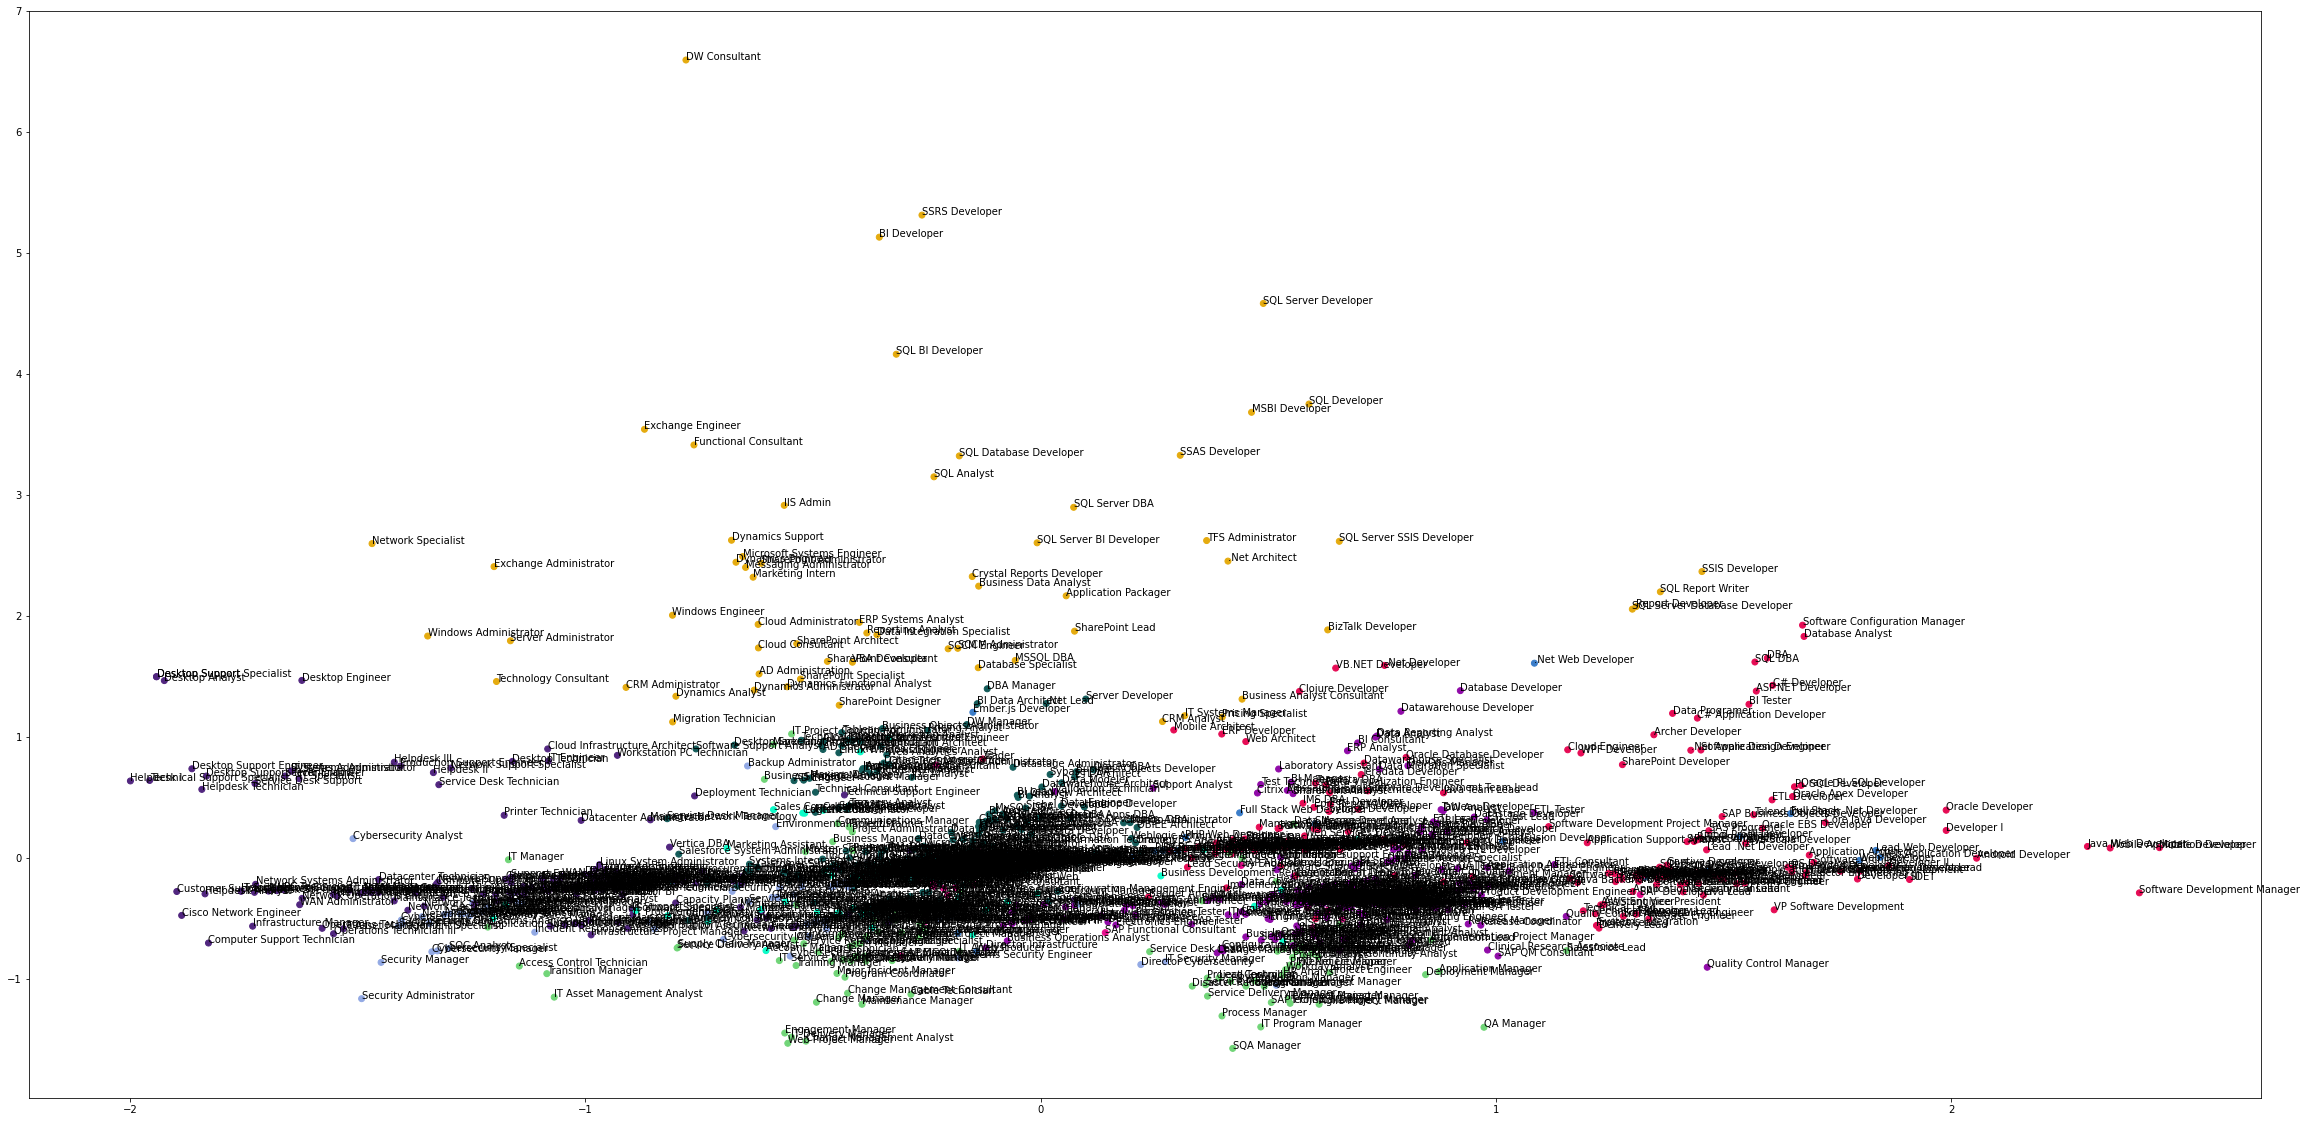

In [92]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

cv = CountVectorizer(analyzer = 'word', max_features = 5000, lowercase=True, preprocessor=None, tokenizer=None, stop_words = 'english')  
vectors = cv.fit_transform(x)
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

number_of_colors = 10

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

x_axis = [o[0]for o in scatter_plot_points]

y_axis = [o[1] for o in scatter_plot_points]


fig, ax = plt.subplots(figsize=(40,20))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

for i, txt in enumerate(jobs_plot.Job_Title.to_list()):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

# clustering

In [3]:
h1b = pd.read_pickle("../data/h1b_clean.pkl")
# h1b_co = h1b[h1b['state'] == 'CO']

In [4]:
data = h1b[['relatedSkills','Dice_job_title']]

In [6]:
df = data

Optimal_k = 33

WordVectorizer = TfidfVectorizer(stop_words='english')

X = WordVectorizer.fit_transform(df['relatedSkills'])

model = KMeans(n_clusters=Optimal_k, init='k-means++', max_iter=200, n_init=10)

model.fit(X)

df['Cluster'] = pd.DataFrame(model.labels_)

df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item_frame_value(key, value)


,relatedSkills,Dice_job_title,Cluster
0,Microsoft technologies;Software development;C#...,.Net Application Developer,18.0
1,Microsoft technologies;Software development;C#...,.Net Application Developer,18.0
2,Microsoft technologies;Software development;C#...,.Net Application Developer,18.0
6,Microsoft technologies;Software development;C#...,.Net Application Developer,18.0
7,Microsoft technologies;Software development;C#...,.Net Application Developer,18.0
...,...,...,...
2495074,Web services;JDBC;Java;Quality assurance;webMe...,webMethods Developer,NaN
2495075,Web services;JDBC;Java;Quality assurance;webMe...,webMethods Developer,NaN
2495076,Web services;JDBC;Java;Quality assurance;webMe...,webMethods Developer,NaN
2495077,Web services;JDBC;Java;Quality assurance;webMe...,webMethods Developer,NaN


# how about just jobs file clustering

In [4]:
jobs = pd.read_csv('Techand_Skills.csv')
# jobs = jobs.rename(columns={"Job_Title": "JOB TITLE"})
jobs

,Job_Title,relatedSkills
0,.Net Application Developer,Microsoft technologies;Software development;C#...
1,.Net Architect,Software development;C#;Microsoft Windows Azur...
2,.Net Developer,Software development;C#;ASP.NET;.NET;Microsoft...
3,.Net Lead,SQL;IBM WebSphere;Java;C#;API;Microsoft SSIS;A...
4,.Net SDET,NaN
...,...,...
1462,Workstation PC Technician,Computer networking;Microsoft Windows 7;Softwa...
1463,Writer Editor,Analytics;IT consulting;Strategy;Security clea...
1464,iOS Architect,Software development;Interfaces;Computer scien...
1465,iOS Developer,Software development;RESTful;Quality assurance...


In [31]:
WordVectorizer = TfidfVectorizer(stop_words='english')

X = WordVectorizer.fit_transform(df['relatedSkills'])
print(((X.shape[0]+X.shape[1])))

2401


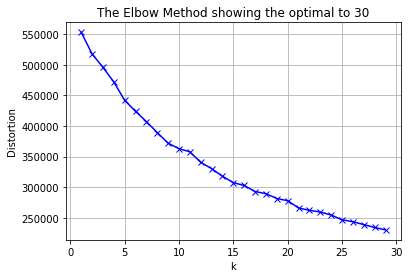

In [4]:
#elbow plot
df = h1b.dropna()

WordVectorizer = TfidfVectorizer(stop_words='english')

X = WordVectorizer.fit_transform(df['relatedSkills'])

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal to 30')
plt.grid()
plt.show()

In [11]:
df = jobs.dropna()

Optimal_k = 33

WordVectorizer = TfidfVectorizer(stop_words='english')

X = WordVectorizer.fit_transform(df['relatedSkills'])

model = KMeans(n_clusters=Optimal_k, init='k-means++', max_iter=200, n_init=10)

model.fit(X)

df['Cluster'] = pd.DataFrame(model.labels_)

df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item_frame_value(key, value)


,Job_Title,relatedSkills,Cluster
0,.Net Application Developer,Microsoft technologies;Software development;C#...,21.0
1,.Net Architect,Software development;C#;Microsoft Windows Azur...,21.0
2,.Net Developer,Software development;C#;ASP.NET;.NET;Microsoft...,21.0
3,.Net Lead,SQL;IBM WebSphere;Java;C#;API;Microsoft SSIS;A...,21.0
5,.Net Technical Lead,IT management;Software development;C#;Quality ...,21.0
...,...,...,...
1462,Workstation PC Technician,Computer networking;Microsoft Windows 7;Softwa...,NaN
1463,Writer Editor,Analytics;IT consulting;Strategy;Security clea...,NaN
1464,iOS Architect,Software development;Interfaces;Computer scien...,NaN
1465,iOS Developer,Software development;RESTful;Quality assurance...,NaN


In [10]:
# df.Cluster.value_counts()

# bls with job skills

In [2]:
departmentofLabourlist = pd.read_excel('soc_2018_direct_match_title_file.xlsx',sheet_name = 'Tech')

In [42]:
print(departmentofLabourlist['2018 SOC Title'].unique())

['Computer Systems Analysts' 'Information Security Analysts'
 'Computer and Information Research Scientists'
 'Computer Network Support Specialists'
 'Computer User Support Specialists' 'Computer Network Architects'
 'Database Administrators' 'Database Architects'
 'Network and Computer Systems Administrators' 'Computer Programmers'
 'Software Developers' 'Software Quality Assurance Analysts and Testers'
 'Web Developers' 'Web and Digital Interface Designers'
 'Computer Occupations, All Other' 'Actuaries' 'Mathematicians'
 'Operations Research Analysts' 'Statisticians' 'Data Scientists'
 'Mathematical Science Occupations, All Other']


In [3]:
dice_skill = pd.read_csv('Techand_Skills.csv')
dice_skill.dropna()

,Job_Title,relatedSkills
0,.Net Application Developer,Microsoft technologies;Software development;C#...
1,.Net Architect,Software development;C#;Microsoft Windows Azur...
2,.Net Developer,Software development;C#;ASP.NET;.NET;Microsoft...
3,.Net Lead,SQL;IBM WebSphere;Java;C#;API;Microsoft SSIS;A...
5,.Net Technical Lead,IT management;Software development;C#;Quality ...
...,...,...
1462,Workstation PC Technician,Computer networking;Microsoft Windows 7;Softwa...
1463,Writer Editor,Analytics;IT consulting;Strategy;Security clea...
1464,iOS Architect,Software development;Interfaces;Computer scien...
1465,iOS Developer,Software development;RESTful;Quality assurance...


In [45]:
print(new['2018 SOC Title'].unique()," total:", new['2018 SOC Title'].nunique())

['Computer Systems Analysts' 'Information Security Analysts'
 'Computer Network Support Specialists'
 'Computer User Support Specialists' 'Computer Network Architects'
 'Database Architects' 'Network and Computer Systems Administrators'
 'Software Developers' 'Software Quality Assurance Analysts and Testers'
 'Web Developers' 'Web and Digital Interface Designers'
 'Operations Research Analysts' 'Statisticians' 'Data Scientists']  total: 14


In [46]:
test1 = pd.merge(departmentofLabourlist, dice_skill.drop_duplicates().dropna(), left_on= 
               ['2018 SOC Direct Match Title'],
                   right_on= ['Job_Title'], 
                   how = 'right')
test1

,2018 SOC Code,2018 SOC Title,2018 SOC Direct Match Title,Illustrative Example,Job_Title,relatedSkills
0,NaN,NaN,NaN,NaN,.Net Application Developer,Microsoft technologies;Software development;C#...
1,NaN,NaN,NaN,NaN,.Net Architect,Software development;C#;Microsoft Windows Azur...
2,NaN,NaN,NaN,NaN,.Net Developer,Software development;C#;ASP.NET;.NET;Microsoft...
3,NaN,NaN,NaN,NaN,.Net Lead,SQL;IBM WebSphere;Java;C#;API;Microsoft SSIS;A...
4,NaN,NaN,NaN,NaN,.Net Technical Lead,IT management;Software development;C#;Quality ...
...,...,...,...,...,...,...
1228,NaN,NaN,NaN,NaN,Workstation PC Technician,Computer networking;Microsoft Windows 7;Softwa...
1229,NaN,NaN,NaN,NaN,Writer Editor,Analytics;IT consulting;Strategy;Security clea...
1230,NaN,NaN,NaN,NaN,iOS Architect,Software development;Interfaces;Computer scien...
1231,NaN,NaN,NaN,NaN,iOS Developer,Software development;RESTful;Quality assurance...


In [112]:
df = test1

Optimal_k = 10

WordVectorizer = TfidfVectorizer(stop_words='english')

X = WordVectorizer.fit_transform(df['relatedSkills'])

model = KMeans(n_clusters=Optimal_k, init='k-means++', max_iter=200, n_init=10)

model.fit(X)

df['Cluster'] = pd.DataFrame(model.labels_)

# df

In [104]:
pd.set_option('display.max_rows', 1500)
test2 = df[['2018 SOC Title','2018 SOC Direct Match Title','Job_Title','relatedSkills','Cluster']]

In [96]:
# test2.dropna().info()

In [105]:
test2.dropna()['Cluster'].unique(), test2.dropna()['Cluster'].nunique()

(array([ 9, 19, 13, 18, 16, 11,  8,  6,  2,  1,  4, 15], dtype=int32), 12)

In [106]:
test2['2018 SOC Title'].unique(),print(test2['2018 SOC Title'].nunique())

14


(array([nan, 'Statisticians', 'Database Architects', 'Data Scientists',
        'Web and Digital Interface Designers',
        'Computer User Support Specialists', 'Computer Systems Analysts',
        'Network and Computer Systems Administrators',
        'Computer Network Architects', 'Information Security Analysts',
        'Computer Network Support Specialists',
        'Operations Research Analysts',
        'Software Quality Assurance Analysts and Testers',
        'Software Developers', 'Web Developers'], dtype=object),
 None)

In [121]:
merge_cluter = pd.merge(h1b, skill_cluster, on= 'relatedSkills')

In [125]:
merge_cluter.Cluster.value_counts()

9    170067
3    122471
8     66990
4     64515
6     62811
7     60051
1     32596
2     14534
5     11768
0      8322
Name: Cluster, dtype: int64